### Import all the packages

In [43]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm
import random


%matplotlib inline

In [2]:
path = './LunarLanderFramesPart1/LunarLanderFramesPart1/'

In [3]:
IMG_SIZE = 150
sample_rate = 0.5
channels = 1

In [7]:
training_data = []

def create_training_data():
    for img in tqdm(os.listdir(path)):  # iterate over each image in the directory
        try:
            action = os.path.splitext(os.path.basename(img))[0].split('_')[3] # extract the action from the filename
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert the image to grayscale 
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image array to normalize the data
            training_data.append([img_array,action])  # add the image and the label to our training_data
        except Exception as e:  # in the interest in keeping the output clean...
            pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
        
create_training_data()

print(len(training_data))

100%|██████████| 30904/30904 [02:14<00:00, 230.13it/s]


30904


Sample the data

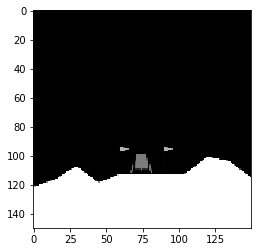

In [45]:
training_data = random.sample(training_data, int(len(training_data) * sample_rate)) # take a sample of data
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [ ]:
random.shuffle(training_data)

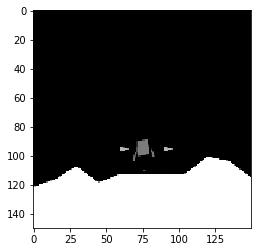

In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


plt.imshow(X[0], cmap='gray')
plt.show()

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [41]:
print(X.shape)

(5176, 150, 150, 1)


Text(0.5, 1.0, 'Labels for actions')

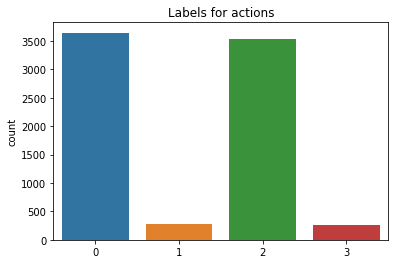

In [15]:
sns.countplot(y)
plt.title("Labels for actions")

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

train_labels = keras.utils.to_categorical(y_train, 4)
test_labels = keras.utils.to_categorical(y_test, 4)
print(train_labels)

print("Shape of train X: ",X_train.shape)
print("Shape of train y: ",train_labels.shape)
print("Shape of test X: ",X_test.shape)
print("Shape of test y: ",test_labels.shape)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
Shape of train X:  (5176, 150, 150, 1)
Shape of train y:  (5176, 4)
Shape of test X:  (2550, 150, 150, 1)
Shape of test y:  (2550, 4)


In [23]:
NAME = "Lunar-Lander-64x2-CNN"

In [35]:
X_train = X_train/255
input_shape = (IMG_SIZE,IMG_SIZE,channels)

model1 = Sequential()

model1.add(Conv2D(32, (8, 8), padding='same', subsample=(4, 4), input_shape=input_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), dim_ordering = 'th'))
model1.add(Conv2D(64, (4, 4), padding='same', subsample=(2, 2), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), dim_ordering = 'th'))
model1.add(Conv2D(64, (3, 3), padding='same', subsample=(1, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), dim_ordering = 'th'))
model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(4, activation = 'softmax'))

model1.summary()

model1.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-3), metrics=['accuracy'])

(150, 150, 1)


C:\Users\MMD\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (8, 8), padding="same", input_shape=(150, 150,..., activation="relu", strides=(4, 4))`
  import sys
C:\Users\MMD\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  
C:\Users\MMD\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), padding="same", activation="relu", strides=(2, 2))`
  if __name__ == '__main__':
C:\Users\MMD\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\MMD\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 38, 38, 32)        2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 19, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 19, 10, 64)        16448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 19, 5, 32)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 19, 5, 64)         18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 2, 32)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1216)              0         
__________

In [36]:
#X = X/255.0

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# output layer


model.add(Dense(4))
model.add(Activation('softmax'))

#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

model.compile(loss='categorical_crossentropy',
              optimizer=adam(lr=1e-3),
              metrics=['accuracy'])

In [33]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 38, 38, 32)        2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 19, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 19, 10, 64)        16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 5, 32)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 19, 5, 64)         18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 19, 2, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1216)              0         
__________

In [37]:
batch_size = 128
epochs = 50

In [38]:
history1 = model1.fit(X_train, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.25, verbose=1, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 3882 samples, validate on 1294 samples
Epoch 1/50
3882/3882 [==============================] - ETA: 4:00 - loss: 10.4782 - acc: 0.25 - ETA: 2:15 - loss: 9.6388 - acc: 0.3281 - ETA: 1:39 - loss: 8.9894 - acc: 0.377 - ETA: 1:21 - loss: 8.8422 - acc: 0.396 - ETA: 1:09 - loss: 8.7728 - acc: 0.404 - ETA: 1:00 - loss: 8.6813 - acc: 0.414 - ETA: 54s - loss: 8.6066 - acc: 0.423 - ETA: 48s - loss: 8.5712 - acc: 0.42 - ETA: 44s - loss: 8.4790 - acc: 0.43 - ETA: 40s - loss: 8.2472 - acc: 0.45 - ETA: 37s - loss: 8.3501 - acc: 0.44 - ETA: 34s - loss: 8.4139 - acc: 0.44 - ETA: 31s - loss: 8.3294 - acc: 0.45 - ETA: 29s - loss: 8.3355 - acc: 0.45 - ETA: 27s - loss: 8.3425 - acc: 0.45 - ETA: 24s - loss: 8.3047 - acc: 0.45 - ETA: 22s - loss: 8.3447 - acc: 0.45 - ETA: 20s - loss: 8.3918 - acc: 0.45 - ETA: 18s - loss: 8.4207 - acc: 0.45 - ETA: 16s - loss: 8.4467 - acc: 0.45 - ETA: 15s - loss: 8.4585 - acc: 0.45 - ETA: 13s - loss: 8.4247 - acc: 0.45 

3882/3882 [==============================] - ETA: 37s - loss: 9.3183 - acc: 0.42 - ETA: 35s - loss: 9.8220 - acc: 0.39 - ETA: 34s - loss: 9.6121 - acc: 0.40 - ETA: 32s - loss: 9.5072 - acc: 0.41 - ETA: 31s - loss: 9.2679 - acc: 0.42 - ETA: 30s - loss: 9.2553 - acc: 0.42 - ETA: 29s - loss: 9.1564 - acc: 0.43 - ETA: 28s - loss: 9.1924 - acc: 0.42 - ETA: 26s - loss: 9.2483 - acc: 0.42 - ETA: 25s - loss: 9.1798 - acc: 0.43 - ETA: 24s - loss: 9.1122 - acc: 0.43 - ETA: 22s - loss: 9.1609 - acc: 0.43 - ETA: 21s - loss: 9.1827 - acc: 0.43 - ETA: 20s - loss: 9.1384 - acc: 0.43 - ETA: 19s - loss: 9.1420 - acc: 0.43 - ETA: 17s - loss: 9.0900 - acc: 0.43 - ETA: 16s - loss: 9.0146 - acc: 0.44 - ETA: 15s - loss: 8.9475 - acc: 0.44 - ETA: 14s - loss: 8.9670 - acc: 0.44 - ETA: 12s - loss: 8.9531 - acc: 0.44 - ETA: 11s - loss: 8.9765 - acc: 0.44 - ETA: 10s - loss: 8.9233 - acc: 0.44 - ETA: 9s - loss: 8.9077 - acc: 0.4474 - ETA: 7s - loss: 8.8880 - acc: 0.448 - ETA: 6s - loss: 8.8146 - acc: 0.453 - ETA:

3882/3882 [==============================] - ETA: 35s - loss: 9.3183 - acc: 0.42 - ETA: 34s - loss: 9.0664 - acc: 0.43 - ETA: 33s - loss: 9.4442 - acc: 0.41 - ETA: 32s - loss: 9.5701 - acc: 0.40 - ETA: 30s - loss: 9.5198 - acc: 0.40 - ETA: 29s - loss: 9.2133 - acc: 0.42 - ETA: 28s - loss: 9.2103 - acc: 0.42 - ETA: 27s - loss: 9.0350 - acc: 0.43 - ETA: 25s - loss: 9.1224 - acc: 0.43 - ETA: 24s - loss: 9.1420 - acc: 0.43 - ETA: 23s - loss: 9.0206 - acc: 0.44 - ETA: 22s - loss: 8.9510 - acc: 0.44 - ETA: 21s - loss: 8.9018 - acc: 0.44 - ETA: 19s - loss: 8.8865 - acc: 0.44 - ETA: 18s - loss: 8.9489 - acc: 0.44 - ETA: 17s - loss: 8.9326 - acc: 0.44 - ETA: 16s - loss: 8.9331 - acc: 0.44 - ETA: 15s - loss: 8.9125 - acc: 0.44 - ETA: 13s - loss: 8.8676 - acc: 0.44 - ETA: 12s - loss: 8.9216 - acc: 0.44 - ETA: 11s - loss: 8.9405 - acc: 0.44 - ETA: 10s - loss: 8.9348 - acc: 0.44 - ETA: 8s - loss: 8.9022 - acc: 0.4477 - ETA: 7s - loss: 8.8461 - acc: 0.451 - ETA: 6s - loss: 8.8196 - acc: 0.452 - ETA:

3882/3882 [==============================] - ETA: 36s - loss: 9.0664 - acc: 0.43 - ETA: 36s - loss: 8.8775 - acc: 0.44 - ETA: 34s - loss: 8.8985 - acc: 0.44 - ETA: 32s - loss: 9.1609 - acc: 0.43 - ETA: 31s - loss: 9.2175 - acc: 0.42 - ETA: 30s - loss: 9.0664 - acc: 0.43 - ETA: 29s - loss: 8.9945 - acc: 0.44 - ETA: 27s - loss: 8.8146 - acc: 0.45 - ETA: 26s - loss: 8.6187 - acc: 0.46 - ETA: 25s - loss: 8.6509 - acc: 0.46 - ETA: 23s - loss: 8.5513 - acc: 0.46 - ETA: 22s - loss: 8.6362 - acc: 0.46 - ETA: 21s - loss: 8.6790 - acc: 0.46 - ETA: 20s - loss: 8.6437 - acc: 0.46 - ETA: 18s - loss: 8.6971 - acc: 0.46 - ETA: 17s - loss: 8.7123 - acc: 0.45 - ETA: 16s - loss: 8.6887 - acc: 0.46 - ETA: 15s - loss: 8.7376 - acc: 0.45 - ETA: 13s - loss: 8.7019 - acc: 0.46 - ETA: 12s - loss: 8.7264 - acc: 0.45 - ETA: 11s - loss: 8.7186 - acc: 0.45 - ETA: 10s - loss: 8.7345 - acc: 0.45 - ETA: 9s - loss: 8.7817 - acc: 0.4552 - ETA: 7s - loss: 8.8041 - acc: 0.453 - ETA: 6s - loss: 8.8146 - acc: 0.453 - ETA:

3882/3882 [==============================] - ETA: 37s - loss: 9.9479 - acc: 0.38 - ETA: 35s - loss: 8.8775 - acc: 0.44 - ETA: 33s - loss: 8.8566 - acc: 0.45 - ETA: 32s - loss: 9.0664 - acc: 0.43 - ETA: 30s - loss: 8.8650 - acc: 0.45 - ETA: 29s - loss: 8.8146 - acc: 0.45 - ETA: 28s - loss: 8.7606 - acc: 0.45 - ETA: 27s - loss: 8.8933 - acc: 0.44 - ETA: 25s - loss: 8.8006 - acc: 0.45 - ETA: 24s - loss: 8.7390 - acc: 0.45 - ETA: 23s - loss: 8.7230 - acc: 0.45 - ETA: 22s - loss: 8.7306 - acc: 0.45 - ETA: 21s - loss: 8.7855 - acc: 0.45 - ETA: 19s - loss: 8.7966 - acc: 0.45 - ETA: 18s - loss: 8.6383 - acc: 0.46 - ETA: 17s - loss: 8.7044 - acc: 0.46 - ETA: 16s - loss: 8.6590 - acc: 0.46 - ETA: 14s - loss: 8.6887 - acc: 0.46 - ETA: 13s - loss: 8.6688 - acc: 0.46 - ETA: 12s - loss: 8.7013 - acc: 0.46 - ETA: 11s - loss: 8.7067 - acc: 0.45 - ETA: 10s - loss: 8.7001 - acc: 0.46 - ETA: 8s - loss: 8.6558 - acc: 0.4630 - ETA: 7s - loss: 8.6782 - acc: 0.461 - ETA: 6s - loss: 8.6635 - acc: 0.462 - ETA:

3882/3882 [==============================] - ETA: 35s - loss: 9.9479 - acc: 0.38 - ETA: 35s - loss: 9.6331 - acc: 0.40 - ETA: 34s - loss: 9.4022 - acc: 0.41 - ETA: 32s - loss: 9.0664 - acc: 0.43 - ETA: 31s - loss: 9.1168 - acc: 0.43 - ETA: 30s - loss: 9.1504 - acc: 0.43 - ETA: 28s - loss: 9.1204 - acc: 0.43 - ETA: 27s - loss: 9.0664 - acc: 0.43 - ETA: 26s - loss: 8.9965 - acc: 0.44 - ETA: 25s - loss: 8.9783 - acc: 0.44 - ETA: 23s - loss: 8.8375 - acc: 0.45 - ETA: 22s - loss: 8.8251 - acc: 0.45 - ETA: 21s - loss: 8.8146 - acc: 0.45 - ETA: 20s - loss: 8.8326 - acc: 0.45 - ETA: 18s - loss: 8.7978 - acc: 0.45 - ETA: 17s - loss: 8.7359 - acc: 0.45 - ETA: 16s - loss: 8.8220 - acc: 0.45 - ETA: 15s - loss: 8.7097 - acc: 0.45 - ETA: 13s - loss: 8.6887 - acc: 0.46 - ETA: 12s - loss: 8.6824 - acc: 0.46 - ETA: 11s - loss: 8.7067 - acc: 0.45 - ETA: 10s - loss: 8.7802 - acc: 0.45 - ETA: 8s - loss: 8.8201 - acc: 0.4528 - ETA: 7s - loss: 8.8093 - acc: 0.453 - ETA: 6s - loss: 8.8196 - acc: 0.452 - ETA:

3882/3882 [==============================] - ETA: 37s - loss: 9.3183 - acc: 0.42 - ETA: 35s - loss: 9.0664 - acc: 0.43 - ETA: 33s - loss: 8.8985 - acc: 0.44 - ETA: 32s - loss: 8.8146 - acc: 0.45 - ETA: 31s - loss: 8.7642 - acc: 0.45 - ETA: 30s - loss: 8.7306 - acc: 0.45 - ETA: 28s - loss: 8.7246 - acc: 0.45 - ETA: 27s - loss: 8.6572 - acc: 0.46 - ETA: 26s - loss: 8.7586 - acc: 0.45 - ETA: 25s - loss: 8.7013 - acc: 0.46 - ETA: 23s - loss: 8.7459 - acc: 0.45 - ETA: 22s - loss: 8.8356 - acc: 0.45 - ETA: 21s - loss: 8.8049 - acc: 0.45 - ETA: 20s - loss: 8.9045 - acc: 0.44 - ETA: 18s - loss: 8.9069 - acc: 0.44 - ETA: 17s - loss: 8.9169 - acc: 0.44 - ETA: 16s - loss: 8.9109 - acc: 0.44 - ETA: 15s - loss: 8.9545 - acc: 0.44 - ETA: 13s - loss: 8.9074 - acc: 0.44 - ETA: 12s - loss: 8.9342 - acc: 0.44 - ETA: 11s - loss: 8.8745 - acc: 0.44 - ETA: 10s - loss: 8.9004 - acc: 0.44 - ETA: 9s - loss: 8.8639 - acc: 0.4501 - ETA: 7s - loss: 8.8828 - acc: 0.448 - ETA: 6s - loss: 8.8599 - acc: 0.450 - ETA:

3882/3882 [==============================] - ETA: 35s - loss: 9.6960 - acc: 0.39 - ETA: 35s - loss: 8.8146 - acc: 0.45 - ETA: 34s - loss: 8.8566 - acc: 0.45 - ETA: 32s - loss: 8.9720 - acc: 0.44 - ETA: 31s - loss: 8.8146 - acc: 0.45 - ETA: 30s - loss: 8.8146 - acc: 0.45 - ETA: 28s - loss: 8.7426 - acc: 0.45 - ETA: 27s - loss: 8.7359 - acc: 0.45 - ETA: 26s - loss: 8.8006 - acc: 0.45 - ETA: 25s - loss: 8.7642 - acc: 0.45 - ETA: 23s - loss: 8.7116 - acc: 0.45 - ETA: 22s - loss: 8.7097 - acc: 0.45 - ETA: 21s - loss: 8.6112 - acc: 0.46 - ETA: 20s - loss: 8.5717 - acc: 0.46 - ETA: 19s - loss: 8.5460 - acc: 0.46 - ETA: 17s - loss: 8.5627 - acc: 0.46 - ETA: 16s - loss: 8.5257 - acc: 0.47 - ETA: 15s - loss: 8.5697 - acc: 0.46 - ETA: 14s - loss: 8.5627 - acc: 0.46 - ETA: 12s - loss: 8.6068 - acc: 0.46 - ETA: 11s - loss: 8.6827 - acc: 0.46 - ETA: 10s - loss: 8.7173 - acc: 0.45 - ETA: 9s - loss: 8.7379 - acc: 0.4579 - ETA: 7s - loss: 8.7569 - acc: 0.456 - ETA: 6s - loss: 8.7592 - acc: 0.456 - ETA:

3882/3882 [==============================] - ETA: 35s - loss: 9.8220 - acc: 0.39 - ETA: 34s - loss: 8.7516 - acc: 0.45 - ETA: 33s - loss: 9.0245 - acc: 0.44 - ETA: 32s - loss: 8.9090 - acc: 0.44 - ETA: 31s - loss: 8.7390 - acc: 0.45 - ETA: 29s - loss: 8.7516 - acc: 0.45 - ETA: 28s - loss: 8.6707 - acc: 0.46 - ETA: 27s - loss: 8.7674 - acc: 0.45 - ETA: 26s - loss: 8.7166 - acc: 0.45 - ETA: 24s - loss: 8.8020 - acc: 0.45 - ETA: 23s - loss: 8.8375 - acc: 0.45 - ETA: 22s - loss: 8.8671 - acc: 0.44 - ETA: 21s - loss: 8.7855 - acc: 0.45 - ETA: 19s - loss: 8.6887 - acc: 0.46 - ETA: 18s - loss: 8.6803 - acc: 0.46 - ETA: 17s - loss: 8.7123 - acc: 0.45 - ETA: 16s - loss: 8.6813 - acc: 0.46 - ETA: 15s - loss: 8.6747 - acc: 0.46 - ETA: 13s - loss: 8.6754 - acc: 0.46 - ETA: 12s - loss: 8.7013 - acc: 0.46 - ETA: 11s - loss: 8.7186 - acc: 0.45 - ETA: 10s - loss: 8.7459 - acc: 0.45 - ETA: 9s - loss: 8.7598 - acc: 0.4565 - ETA: 7s - loss: 8.7516 - acc: 0.457 - ETA: 6s - loss: 8.7290 - acc: 0.458 - ETA:

In [39]:

loss = history1.history['loss']
val_loss = history1.history['val_loss']
plt.figure(figsize=(18,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,epochs)[0::2])
plt.legend()
plt.show()

In [47]:
# Make a set of predictions for the validation data
pred = model1.predict_classes(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, pred) 
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, pred))
model_accuracy_comparison['CNN Model 1'] = accuracy
# Print confusion matrix
print("Confusion Matrix")
print(metrics.confusion_matrix(test_labels, pred))

****** Test Data ********


C:\Users\MMD\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:182: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Accuracy: 0.0


ValueError: Mix of label input types (string and number)

In [ ]:

stack_size = 4 # We stack 4 frames

# Initialize deque with zero-images one array for each image
stacked_frames  =  deque([np.zeros((110,84), dtype=np.int) for i in range(stack_size)], maxlen=4)

def stack_frames(stacked_frames, state, is_new_episode):
    # Preprocess frame
    frame = preprocess_frame(state)
    
    if is_new_episode:
        # Clear our stacked_frames
        stacked_frames = deque([np.zeros((110,84), dtype=np.int) for i in range(stack_size)], maxlen=4)
        
        # Because we're in a new episode, copy the same frame 4x
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        stacked_frames.append(frame)
        
        # Stack the frames
        stacked_state = np.stack(stacked_frames, axis=2)
        
    else:
        # Append frame to deque, automatically removes the oldest frame
        stacked_frames.append(frame)

        # Build the stacked state (first dimension specifies different frames)
        stacked_state = np.stack(stacked_frames, axis=2) 
    
    return stacked_state, stacked_frames